In [36]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics

In [2]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [3]:
## Reading the data
house = pd.read_csv("Maison.csv")

In [4]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# Data Transformations & Analysis

In [5]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [6]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [7]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# numerical features
num_cols = ['price', 'area']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(house[[i]])
    
    # transform the training data column
    house[i] = scale.transform(house[[i]])
   

C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [8]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,-0.979136,0.323028,3,1,2,1,0,1,0,0,1,0
1,-1.110329,-0.531013,2,1,1,1,0,0,0,0,0,0
2,-0.698008,-0.964958,3,1,1,1,0,0,0,0,0,0
3,-0.285686,0.692343,3,1,2,1,1,0,0,0,0,0
4,-0.266944,0.558466,2,1,1,1,0,0,0,0,0,0


In [9]:
house.shape

(546, 12)

In [10]:
#there are no null values present in the data
house.isnull().sum()

price        0
area         0
rooms        0
bathroom     0
floors       0
driveway     0
game_room    0
cellar       0
gas          0
air          0
garage       0
situation    0
dtype: int64

In [11]:
house.describe()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,5.460000e+02,5.460000e+02,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,-1.992708e-16,6.994812e-17,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,1.000917e+00,1.000917e+00,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,-1.616360e+00,-1.615876e+00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.120642e-01,-7.156705e-01,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.294606e-01,-2.540267e-01,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.202150e-01,5.584664e-01,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,4.568463e+00,5.101041e+00,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [12]:
#checked and found dependent data is not at all correlated
df = pd.DataFrame(house)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
price,1,0.54,0.37,0.52,0.42,0.3,0.25,0.19,0.093,0.45,0.38,0.33
area,0.54,1,0.15,0.19,0.084,0.29,0.14,0.047,-0.0092,0.22,0.35,0.23
rooms,0.37,0.15,1,0.37,0.41,-0.012,0.08,0.097,0.046,0.16,0.14,0.079
bathroom,0.52,0.19,0.37,1,0.32,0.042,0.13,0.1,0.067,0.18,0.18,0.064
floors,0.42,0.084,0.41,0.32,1,0.12,0.042,-0.17,0.018,0.3,0.043,0.043
driveway,0.3,0.29,-0.012,0.042,0.12,1,0.092,0.043,-0.012,0.11,0.2,0.2
game_room,0.25,0.14,0.08,0.13,0.042,0.092,1,0.37,-0.01,0.14,0.038,0.16
cellar,0.19,0.047,0.097,0.1,-0.17,0.043,0.37,1,0.0047,0.045,0.053,0.23
gas,0.093,-0.0092,0.046,0.067,0.018,-0.012,-0.01,0.0047,1,-0.13,0.068,-0.059
air,0.45,0.22,0.16,0.18,0.3,0.11,0.14,0.045,-0.13,1,0.16,0.12


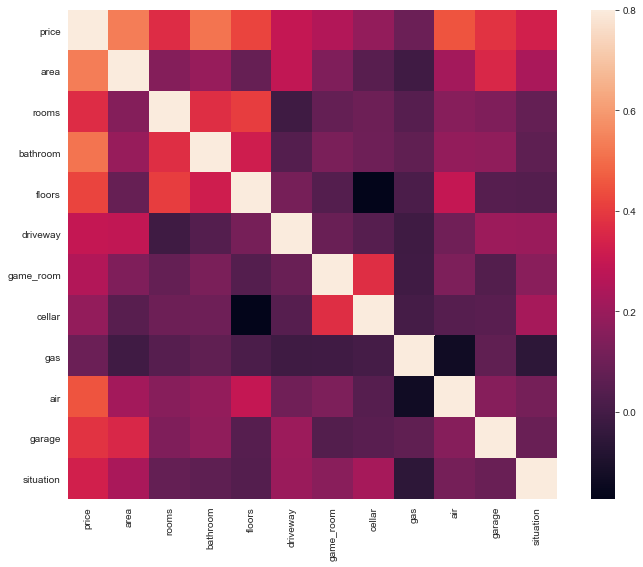

In [13]:
# Correelation Matrix
corrmat = house.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

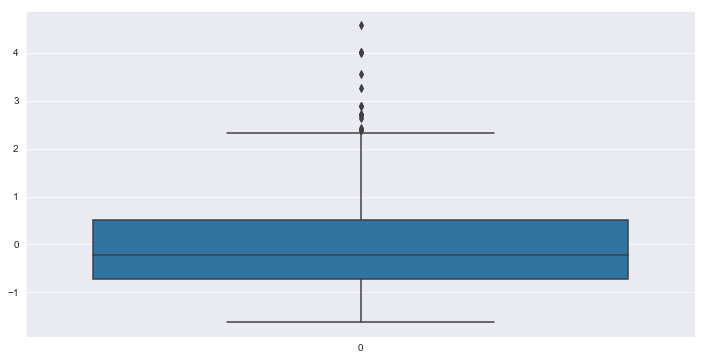

In [14]:
#price has got some outliers
sns.boxplot(data=house['price'])

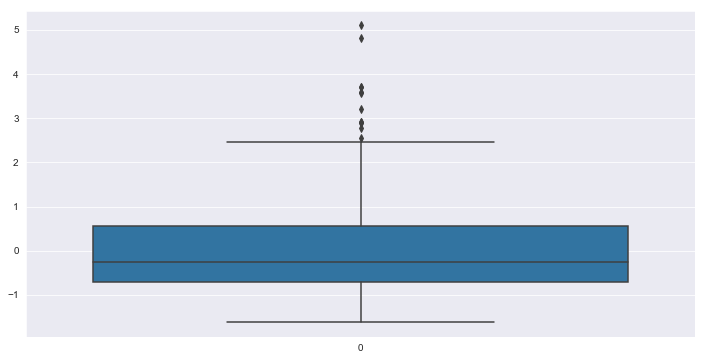

In [15]:
#area has got some outliers
sns.boxplot(data=house['area'])

In [16]:
#finding outliers in Price
import statistics

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    # Set upper and lower limit to 3 standard deviation
    anomalies = []
    data_std = statistics.stdev(data)
    data_mean = statistics.mean(data)
    anomaly_cut_off = data_std * 3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit)
    print(upper_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    print
    return anomalies



In [17]:
# finding anamolies of price
find_anomalies(house['price'])

-3.002751032214941
3.002751032214941


[3.5564010697142288,
 4.006206415487975,
 3.2565308391983976,
 4.006206415487975,
 4.568463097705159,
 3.987464526080736]

In [18]:
# finding anamolies of Area
find_anomalies(house['area'])

-3.002751032214941
3.002751032214941


[3.2036853032969757,
 4.824055005391149,
 3.716109909942142,
 5.101041279253401,
 3.716109909942142,
 3.5979290997609144,
 3.577616773011016]

# 1st stage outlier removal

In [19]:
#Checking the price outliers dataset
house[(house['price']>3.002751032214941) | (house["price"] < -3.002751032214941)]

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
92,3.556401,1.047809,4,1,2,1,1,1,0,1,2,0
331,4.006206,1.758740,4,4,4,1,0,0,0,1,3,0
337,3.256531,1.084740,3,3,1,1,0,1,0,1,2,1
362,4.006206,2.220384,3,2,2,1,0,1,0,0,2,1
377,4.568463,1.047809,4,2,3,1,0,0,0,1,2,1
418,3.987465,1.084740,4,2,2,1,0,1,0,1,3,1


In [20]:
#Checking the area outhliers dataset
house[(house['area']>3.002751032214941) | (house["area"] < -3.002751032214941)]

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
358,1.082472,3.203685,4,2,2,1,0,0,0,0,2,1
364,0.628918,4.824055,3,1,1,1,0,0,0,1,2,0
365,1.157439,3.716110,2,1,1,1,0,1,1,0,1,0
368,2.881693,5.101041,5,3,2,1,0,0,0,0,0,0
382,2.694274,3.716110,3,1,2,1,0,1,0,1,2,1
490,-0.679266,3.597929,3,1,1,1,0,0,0,0,0,0
532,0.070410,3.577617,3,1,1,1,0,0,0,0,2,0


In [21]:
#removing outliers from price
house=house[(house['price']<3.002751032214941)]

In [22]:
#removing outliers from 'area'
house=house[(house['area']<3.002751032214941)]

In [23]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,-0.979136,0.323028,3,1,2,1,0,1,0,0,1,0
1,-1.110329,-0.531013,2,1,1,1,0,0,0,0,0,0
2,-0.698008,-0.964958,3,1,1,1,0,0,0,0,0,0
3,-0.285686,0.692343,3,1,2,1,1,0,0,0,0,0
4,-0.266944,0.558466,2,1,1,1,0,0,0,0,0,0


In [24]:
house.shape

(533, 12)

In [25]:
house.columns

Index(['price', 'area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation'],
      dtype='object')

In [26]:
# let's do the split of the dataset
X = house[['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]
y = house['price']

In [27]:
X.head()

,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,0.323028,3,1,2,1,0,1,0,0,1,0
1,-0.531013,2,1,1,1,0,0,0,0,0,0
2,-0.964958,3,1,1,1,0,0,0,0,0,0
3,0.692343,3,1,2,1,1,0,0,0,0,0
4,0.558466,2,1,1,1,0,0,0,0,0,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [29]:
X_test.head()

,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
108,-0.992657,3,2,2,1,1,1,0,0,0,0
8,-0.161698,3,1,1,1,1,1,0,0,0,0
101,-0.854164,3,3,2,1,0,1,0,0,0,0
397,0.696960,4,2,2,1,1,1,0,0,1,1
315,0.489220,4,1,4,1,1,0,0,1,0,0


In [30]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
import statsmodels.api as sm
X_endog = sm.add_constant(X_test)

C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
res = sm.OLS(y_test, X_endog)
res.fit()

In [32]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     33.51
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           8.65e-35
Time:                        01:29:01   Log-Likelihood:                -109.41
No. Observations:                 160   AIC:                             242.8
Df Residuals:                     148   BIC:                             279.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9261      0.202     -9.556      0.000      -2.324      -1.528
area           0.2740      0.052      5.317      0.000       0.172       0.376
rooms          0.0597      0.055      1.077      0.283      -0.050       0.169
bathroom       0.6105      0.090      6.786      0.000       0.433       0.788
floors         0.1718      0.060      2.844      0.005       0.052       0.291
driveway       0.2846      0.113      2.518      0.013       0.061       0.508
game_room      0.2579      0.112      2.303      0.023       0.037       0.479
cellar         0.0605      0.098      0.617      0.538      -0.133       0.254
gas            0.4416      0.265      1.668      0.097      -0.082       0.965
air            0.6667      0.095      7.019      0.000       0.479       0.854
garage         0.0132      0.052      0.253      0.801      -0.090       0.117
situation      0.2467      0.109      2.267      0.025       0.032       0.462
==============================================================================
Omnibus:                        5.618   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.755
Skew:                           0.457   Prob(JB):                       0.0563
Kurtosis:                       2.831   Cond. No.                         28.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# On removal of garage and celler from dataset

In [33]:
x_BE_opt=X_endog[['const', 'area', 'bathroom', 'floors', 'driveway', 'game_room', 'gas', 'air', 'situation']]
regressor_OLS =sm.OLS(endog=y_test,exog=x_BE_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     46.21
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           7.30e-37
Time:                        01:29:01   Log-Likelihood:                -110.40
No. Observations:                 160   AIC:                             238.8
Df Residuals:                     151   BIC:                             266.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7774      0.161    -11.026      0.000      -2.096      -1.459
area           0.2848      0.048      5.932      0.000       0.190       0.380
bathroom       0.6417      0.085      7.556      0.000       0.474       0.809
floors         0.1920      0.053      3.592      0.000       0.086       0.298
driveway       0.2612      0.110      2.364      0.019       0.043       0.479
game_room      0.2826      0.104      2.727      0.007       0.078       0.487
gas            0.5049      0.259      1.952      0.053      -0.006       1.016
air            0.6694      0.094      7.136      0.000       0.484       0.855
situation      0.2572      0.105      2.440      0.016       0.049       0.465
==============================================================================
Omnibus:                        7.495   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                7.795
Skew:                           0.538   Prob(JB):                       0.0203
Kurtosis:                       2.887   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
lm = LinearRegression()
lm.fit(X_test,y_test)
predictions = lm.predict(X_test)
print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 0.39181614839516926
MSE : 0.2298747668141056
RMSE : 0.47945256993169366
